
Data has three different varieties of grains:

To construct the data, seven geometric parameters (features) of grains were measured:

* area A,
* perimeter P,
* compactness C = 4*pi*A/P^2,
* length of kernel,
* width of kernel,
* asymmetry coefficient
* length of kernel groove.
* target (abba-0, massa-1 , indian-2)
* Massa-Largest, Abba-Avg, Indian-smallest

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**EDA:**

In [3]:
data = pd.read_csv('/content/drive/My Drive/Python for ML-Mahesh Anand/grains.csv')
data.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


Let's see our data's information:

In [4]:
data['target'].value_counts()

2    70
1    70
0    70
Name: target, dtype: int64

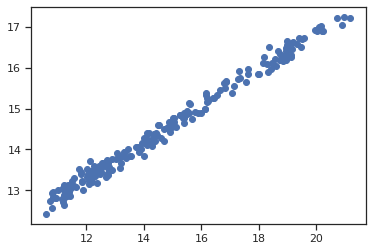

In [5]:
plt.scatter(data['A'],data['P'])

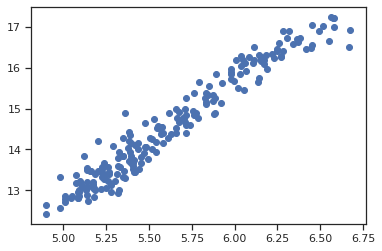

In [7]:
plt.scatter(data['LK'],data['P'])

In [6]:
data.corr()

,A,P,C,LK,WK,A_Coef,LKG,target
A,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
P,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
C,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
LK,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
WK,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
A_Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
LKG,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
target,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [ ]:
data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


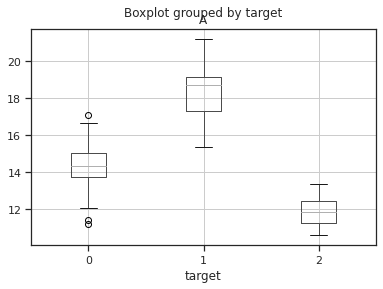

In [9]:
data.boxplot(column='A',by='target')

**Let's check the correlations between the features :**

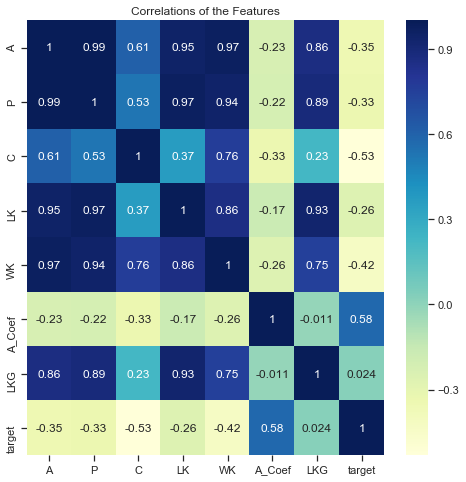

In [ ]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlations of the Features')
plt.show()

Let's see how many target classes we have in our data:

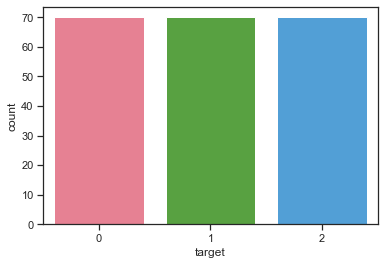

In [ ]:
sns.countplot(data['target'], palette='husl')
plt.show()

**So, we have equally separeted 70 x 3 classes of grain's in our data.**

**Let's visualize all the features using a pairplot:**

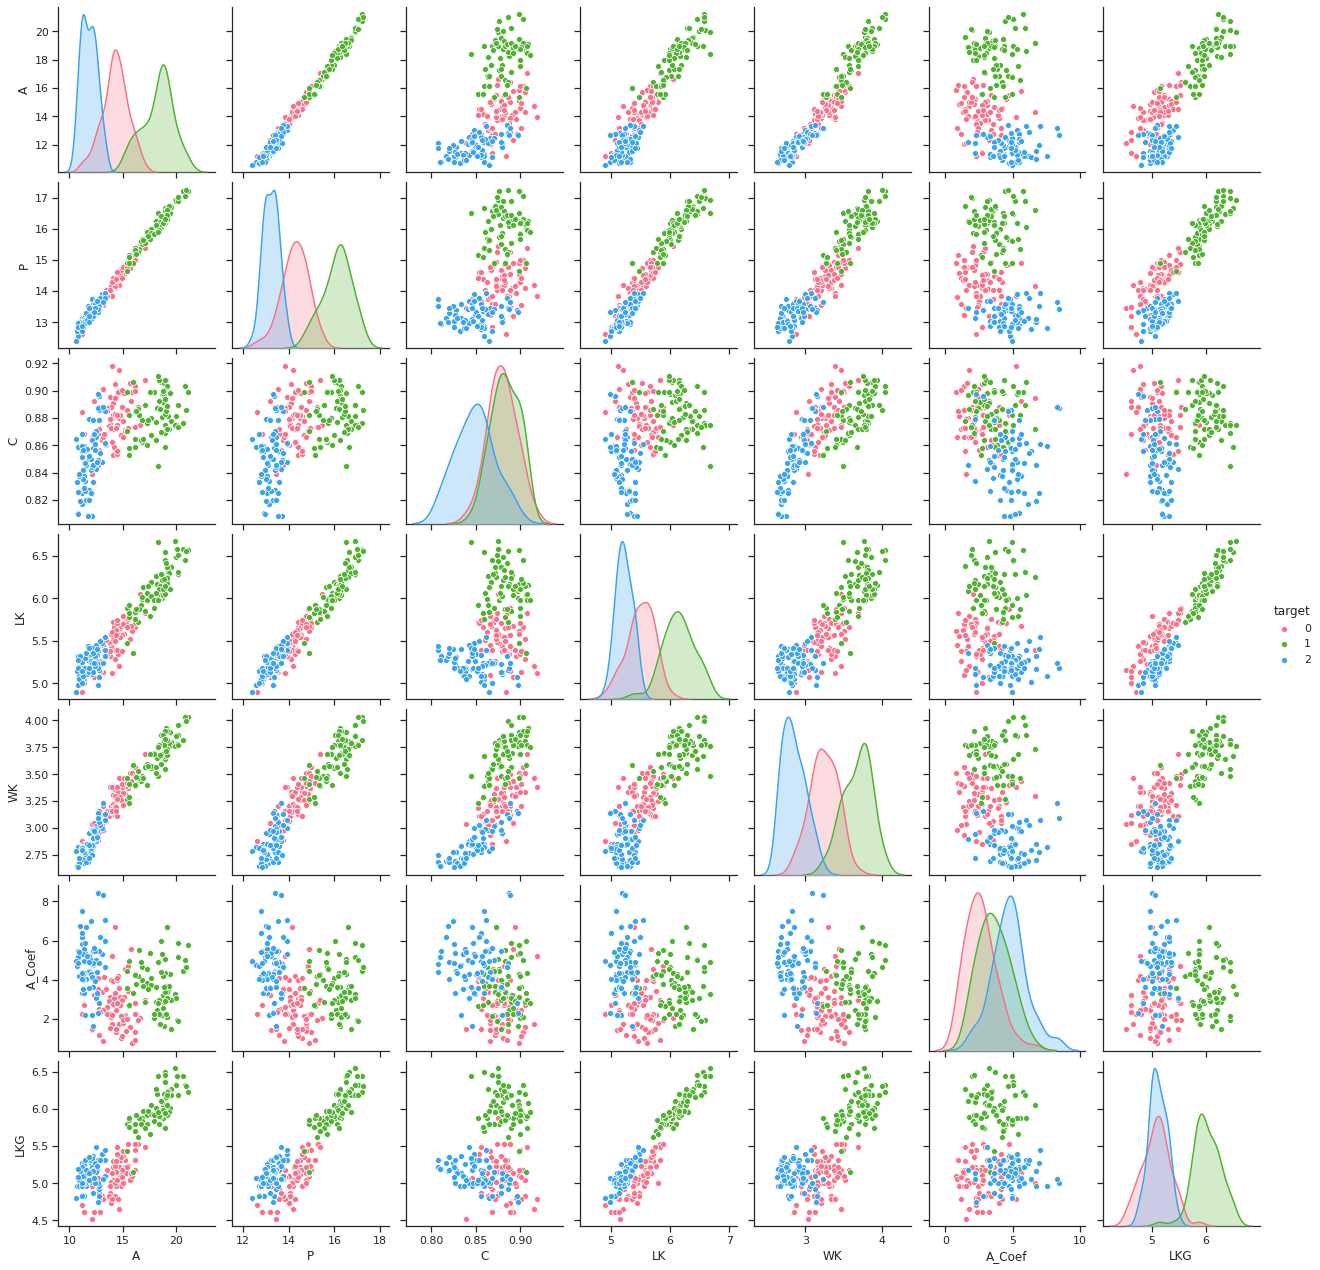

In [8]:
sns.pairplot(data, vars = ['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'] ,hue='target', palette='husl')
plt.show()

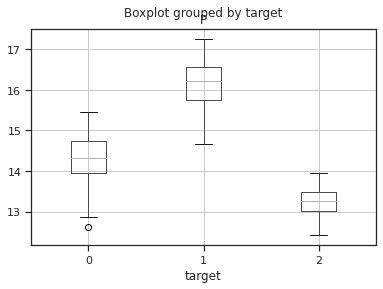

In [ ]:
data.boxplot(column='P',by='target')

In [10]:
from sklearn.preprocessing import StandardScaler
X=data.drop('target',axis=1)
sc=StandardScaler()
X_std=sc.fit_transform(X)
X_std_df=pd.DataFrame(X_std)

In [ ]:
X_std_df.head(10)

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
5,-0.161062,-0.268094,1.022413,-0.548709,0.141702,-0.825482,-0.922013
6,-0.054267,-0.053180,0.377610,-0.148263,0.001049,-0.076135,-0.385617
7,-0.254076,-0.352525,0.852728,-0.471787,0.115164,-0.666813,-0.832274
8,0.614062,0.691344,0.157019,0.960316,0.547738,-1.106821,0.956394
9,0.548607,0.530158,0.721222,0.577969,0.653891,-1.154155,0.254796


In [ ]:
x0=X_std_df.loc[:1]
x0

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013


In [ ]:
x1=X_std_df.loc[74:75]
x1

,0,1,2,3,4,5,6
74,0.679517,0.729721,0.322462,0.878869,0.603468,0.202536,0.882971
75,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153


In [ ]:
x2=X_std_df.loc[145:146]
x2

,0,1,2,3,4,5,6
145,-1.253124,-1.097049,-2.303414,-0.790786,-1.516941,1.645896,-0.271403
146,-1.177335,-1.097049,-1.590736,-1.023814,-1.432019,-0.986152,-0.563056


In [ ]:
df_small=pd.concat([x0,x1,x2],ignore_index=True)
df_small

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,0.679517,0.729721,0.322462,0.878869,0.603468,0.202536,0.882971
3,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
4,-1.253124,-1.097049,-2.303414,-0.790786,-1.516941,1.645896,-0.271403
5,-1.177335,-1.097049,-1.590736,-1.023814,-1.432019,-0.986152,-0.563056


In [ ]:
np.sqrt(np.sum(np.square(df_small.loc[4]-df_small.loc[5])))

2.754614612216079

In [ ]:
c0=np.mean(df_small.loc[:1],axis=0)

In [ ]:
np.sum((df_small.loc[0]-c0)**2)+np.sum((df_small.loc[1]-c0)**2)

0.7017427347441934

In [ ]:
from scipy.spatial.distance import pdist

In [ ]:
pdist(df_small)

array([1.18468792, 2.05372844, 2.36322058, 4.45709696, 3.20416957,
       3.07594602, 3.47808743, 5.08190767, 3.29698784, 0.91706974,
       4.96660521, 4.65968895, 4.38785097, 4.50365926, 2.75461461])

**We can easily see the three target classes from our pairplot above.**

**Now we are going to visualize each feature. But in order to see the differences between the classes, we are going to show three boxplots for each feature. Each boxplot will show us the corresponding target class' values.**

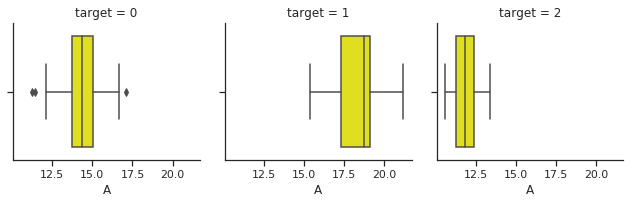

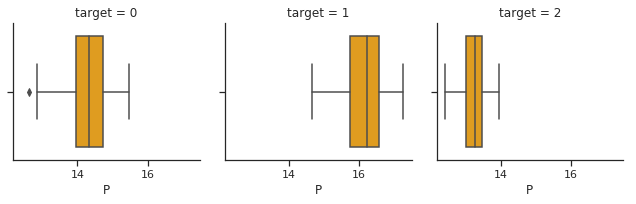

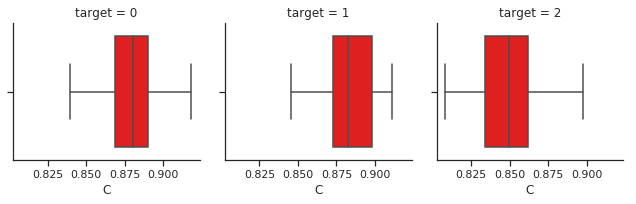

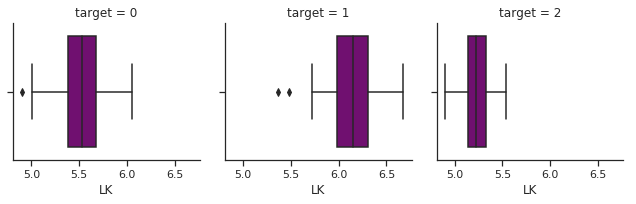

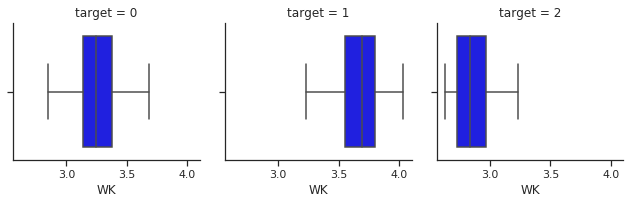

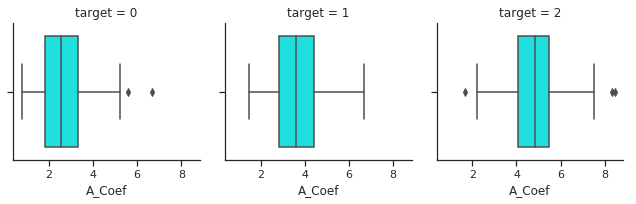

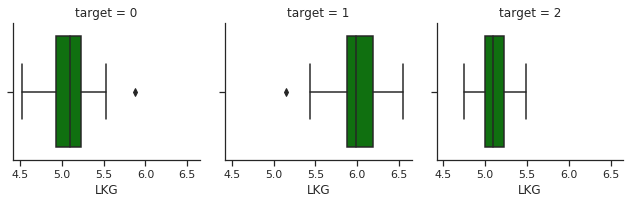

In [ ]:
a = sns.FacetGrid(data, col='target')
a.map(sns.boxplot, 'A', color='yellow', order=['0', '1', '2'])

p = sns.FacetGrid(data, col='target')
p.map(sns.boxplot, 'P', color='orange', order=['0', '1', '2'])

c = sns.FacetGrid(data, col='target')
c.map(sns.boxplot, 'C', color='red', order=['0', '1', '2'])

lk = sns.FacetGrid(data, col='target')
lk.map(sns.boxplot, 'LK', color='purple', order=['0', '1', '2'])

wk = sns.FacetGrid(data, col='target')
wk.map(sns.boxplot, 'WK', color='blue', order=['0', '1', '2'])

acoef = sns.FacetGrid(data, col='target')
acoef.map(sns.boxplot, 'A_Coef', color='cyan', order=['0', '1', '2'])

lkg = sns.FacetGrid(data, col='target')
lkg.map(sns.boxplot, 'LKG', color='green', order=['0', '1', '2'])

In [ ]:
data['A_Coef'][70:140].describe()

count    70.000000
mean      3.644800
std       1.181868
min       1.472000
25%       2.845500
50%       3.609500
75%       4.436000
max       6.682000
Name: A_Coef, dtype: float64

**As an example: from the graph above, we have three boxplots showing LKG feature values according to three classes.** 
* If our  grain has a LKG value around 4.9-5.2 it belongs to target 0, 
* If it's around 5.9-6.2 it belongs to target 1, 
* And finally if it's around 5.0-5.3 it belongs to target 2.

**CREATING THE DATA SET:**

In [11]:
# Excluding target feature and create a new dataset:
df = data.iloc[:,0:7]
df.head(3)

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825


In [ ]:
from scipy.stats import zscore
df_scaled = df.apply(zscore)

Now we are going to build our machine learning clustering models. 

we will be using two methods; **k-means clustering** and **hierarchical clustering/Agglomerative clustering** algorithms.

For k-means clustering algorithm:

* First of all I will find the best k value.
* Than I will use this k value to create a k-means model.
* And I will compare my original and k-means clustered datas.

For hierarchical clustering algorithm:

* First I will apply a dendrogram in order to find how many classes do I have in my data.
* Than I will use this class number to apply a hierarchical clustering algorithm.
* Lastly I will compare my original, k-means and hierarchical clustered datas.


**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

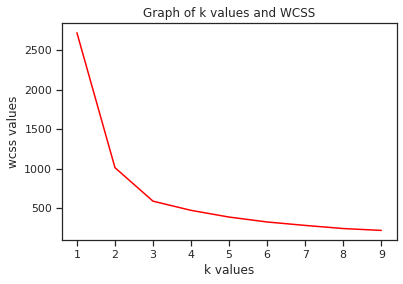

In [12]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

We already know that our data set has three classes. 

Bu if we didn't know how many classes we have in our data set, we sould use this method. 

And according to the graph; it's elbow (where it bends) is the best k value for our K Means algorithm.

In [ ]:
cov_matrix = np.cov(X_std.T)
cov_matrix.shape

(7, 7)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vecs

array([[ 0.44447352,  0.02656355, -0.02587094,  0.19363997,  0.20441167,
        -0.73480569, -0.42643686],
       [ 0.44157147,  0.08400282,  0.05983912,  0.29545659,  0.17427591,
         0.67075153, -0.47623853],
       [ 0.27701737, -0.52915125, -0.62969178, -0.3328164 , -0.33265481,
         0.0725527 , -0.14162884],
       [ 0.42356333,  0.20597518,  0.21187966,  0.26340659, -0.76609839,
        -0.04627605,  0.27357647],
       [ 0.43281866, -0.11668963, -0.21648338,  0.19963039,  0.46536555,
         0.03928908,  0.70301171],
       [-0.11869248,  0.71688203, -0.67950584,  0.09246481, -0.03625822,
         0.00372346, -0.01964186],
       [ 0.38716084,  0.37719327,  0.2138972 , -0.80414995,  0.11134657,
         0.0344981 ,  0.04282974]])

In [ ]:
eig_vals

array([5.05527392e+00, 1.20330286e+00, 6.81247474e-01, 6.86915798e-02,
       1.88031478e-02, 8.16283865e-04, 5.35755786e-03])

In [ ]:
5.05527/(np.sum(eig_vals))+1.20330286/(np.sum(eig_vals))

0.8898243045850338

In [ ]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
eigen_pairs

[(5.055273918920042,
  array([ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
         -0.11869248,  0.38716084])),
 (1.2033028605929323,
  array([ 0.02656355,  0.08400282, -0.52915125,  0.20597518, -0.11668963,
          0.71688203,  0.37719327])),
 (0.6812474741717405,
  array([-0.02587094,  0.05983912, -0.62969178,  0.21187966, -0.21648338,
         -0.67950584,  0.2138972 ])),
 (0.06869157975283598,
  array([ 0.19363997,  0.29545659, -0.3328164 ,  0.26340659,  0.19963039,
          0.09246481, -0.80414995])),
 (0.018803147801790945,
  array([ 0.20441167,  0.17427591, -0.33265481, -0.76609839,  0.46536555,
         -0.03625822,  0.11134657])),
 (0.0008162838654995576,
  array([-0.73480569,  0.67075153,  0.0725527 , -0.04627605,  0.03928908,
          0.00372346,  0.0344981 ])),
 (0.005357557861666678,
  array([-0.42643686, -0.47623853, -0.14162884,  0.27357647,  0.70301171,
         -0.01964186,  0.04282974]))]

In [ ]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
eigen_pairs_sorted

[(5.055273918920042,
  array([ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
         -0.11869248,  0.38716084])),
 (1.2033028605929323,
  array([ 0.02656355,  0.08400282, -0.52915125,  0.20597518, -0.11668963,
          0.71688203,  0.37719327])),
 (0.6812474741717405,
  array([-0.02587094,  0.05983912, -0.62969178,  0.21187966, -0.21648338,
         -0.67950584,  0.2138972 ])),
 (0.06869157975283598,
  array([ 0.19363997,  0.29545659, -0.3328164 ,  0.26340659,  0.19963039,
          0.09246481, -0.80414995])),
 (0.018803147801790945,
  array([ 0.20441167,  0.17427591, -0.33265481, -0.76609839,  0.46536555,
         -0.03625822,  0.11134657])),
 (0.005357557861666678,
  array([-0.42643686, -0.47623853, -0.14162884,  0.27357647,  0.70301171,
         -0.01964186,  0.04282974])),
 (0.0008162838654995576,
  array([-0.73480569,  0.67075153,  0.0725527 , -0.04627605,  0.03928908,
          0.00372346,  0.0344981 ]))]

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 71.87430266  88.98248618  98.66824959  99.64488498  99.91222225
  99.98839433 100.        ]


In [ ]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]
#Project data onto 2d 

In [ ]:
eigvectors_sort

[array([ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
        -0.11869248,  0.38716084]),
 array([ 0.02656355,  0.08400282, -0.52915125,  0.20597518, -0.11668963,
         0.71688203,  0.37719327]),
 array([-0.02587094,  0.05983912, -0.62969178,  0.21187966, -0.21648338,
        -0.67950584,  0.2138972 ]),
 array([ 0.19363997,  0.29545659, -0.3328164 ,  0.26340659,  0.19963039,
         0.09246481, -0.80414995]),
 array([ 0.20441167,  0.17427591, -0.33265481, -0.76609839,  0.46536555,
        -0.03625822,  0.11134657]),
 array([-0.42643686, -0.47623853, -0.14162884,  0.27357647,  0.70301171,
        -0.01964186,  0.04282974]),
 array([-0.73480569,  0.67075153,  0.0725527 , -0.04627605,  0.03928908,
         0.00372346,  0.0344981 ])]

In [ ]:
P_reduce = np.array(eigvectors_sort[0:2]).transpose()
P_reduce

array([[ 0.44447352,  0.02656355],
       [ 0.44157147,  0.08400282],
       [ 0.27701737, -0.52915125],
       [ 0.42356333,  0.20597518],
       [ 0.43281866, -0.11668963],
       [-0.11869248,  0.71688203],
       [ 0.38716084,  0.37719327]])

In [ ]:
# Let's project our feature space data into PC domain
X_pca = np.dot(X_std,P_reduce)
X_pca.shape

(210, 2)

In [ ]:
np.set_printoptions(suppress=True)
print(X_std[:5,:])

[[ 0.14209777  0.21546244  0.0000606   0.3042182   0.14170182 -0.98615174
  -0.38357742]
 [ 0.01118803  0.00822376  0.42851527 -0.16862466  0.19743223 -1.7881662
  -0.92201349]
 [-0.19206658 -0.36020056  1.44238325 -0.76363745  0.20804754 -0.66747933
  -1.18919199]
 [-0.34709127 -0.47533316  1.03938133 -0.68897805  0.31950836 -0.96081795
  -1.2299826 ]
 [ 0.44525718  0.33059504  1.37450924  0.06666556  0.80515903 -1.56349549
  -0.4753563 ]]


In [ ]:
X_pca[:5,:]

array([[ 0.31704705, -0.78366902,  0.63101001,  0.41684594, -0.10749566],
       [-0.00338618, -1.91321367,  0.66975446,  0.43307058,  0.04440642],
       [-0.45944334, -1.90722525, -0.93248882,  0.11129161, -0.0082219 ],
       [-0.59193565, -1.93106922, -0.49931092,  0.2289766 ,  0.07485254],
       [ 1.10291005, -2.06809003, -0.05670541,  0.14242065,  0.01877457]])

**K-Means Clustering Algorithm:**

In [ ]:
from sklearn.cluster import KMeans
# Now we know our best k value is 3, I am creating a new kmeans model:
m1 = KMeans(n_clusters=3,n_init=15,random_state=2)
m1.fit(X_pca)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [ ]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df

,0,1
0,-0.302807,-1.017140
1,2.805258,0.416900
2,-2.340143,0.638053


In [ ]:
#L0- Massa group, L1-Abba group, L2-Indian group

In [ ]:
m1.inertia_

270.3316934585104

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X_pca,m1.labels_)

0.49343048696031894

In [17]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

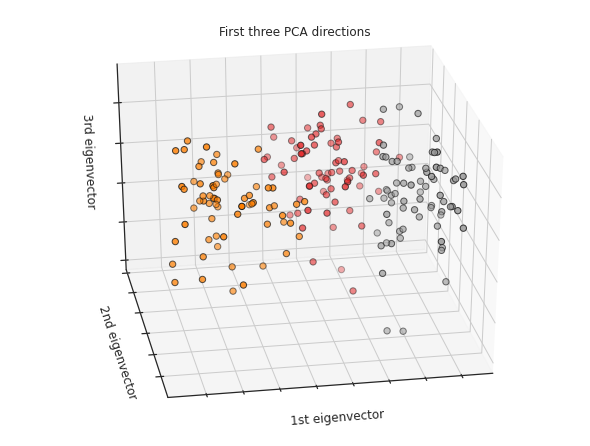

In [ ]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=100)
X_reduced = PCA(n_components=7).fit_transform(X_std) #210 x7
ax.scatter(X_reduced[:,0], X_reduced[:, 1],X_reduced[:,2], c=m1.labels_,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

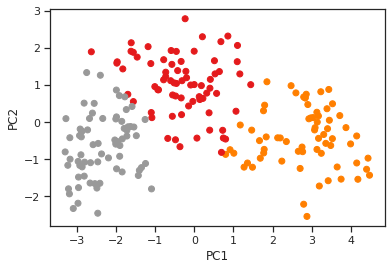

In [ ]:
# Plot the training points (scatter plot of PC1 and PC2 dimensions only),edgecolor='k'
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=m1.labels_, cmap=plt.cm.Set1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [13]:
from sklearn.cluster import KMeans
# Now we know our best k value is 3, I am creating a new kmeans model:
km = KMeans(n_clusters=3,n_init=15,random_state=2)
km.fit(X_std)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [14]:
km.inertia_

430.65897315130053

In [23]:
from sklearn import metrics
metrics.silhouette_score(X_std,km.labels_)

0.4007270552751299

In [15]:
centroids=km.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(X_std_df))
centroid_df.columns=X.columns
centroid_df

,A,P,C,LK,WK,A_Coef,LKG
0,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308
1,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893
2,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809


In [ ]:
#Centroid of Label-0, indicates Large size grain (Massa)
#Centroid of Label-1, indicates Average size grain (Abba)
#Centroid of Label-2, indicates small size grain (Indian)


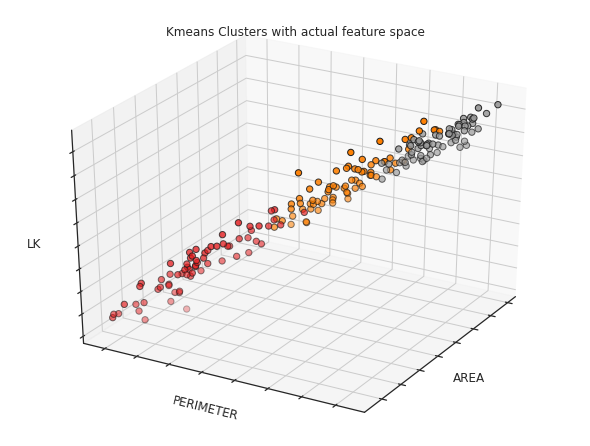

In [22]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=150)
ax.scatter(X_std[:, 0], X_std[:, 1], X_std[:, 3], c=km.labels_,
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("Kmeans Clusters with actual feature space")
ax.set_xlabel("AREA")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PERIMETER")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("LK")
ax.w_zaxis.set_ticklabels([])

plt.show()

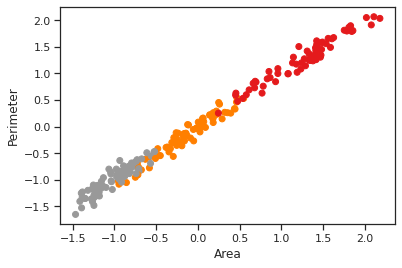

In [ ]:
# Plot the training points (scatter plot of PC1 and PC2 dimensions only),edgecolor='k'
plt.scatter(X_std[:, 0], X_std[:, 1], c=km.labels_, cmap=plt.cm.Set1)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

In [ ]:
# Adding a label feature with the predicted class values:
df_k = X_std_df.copy(deep=True)
df_k['label'] = m1.labels_

In [ ]:
df_k['label'].value_counts()

0    72
2    71
1    67
Name: label, dtype: int64

In [ ]:
df0=df_k[df_k['label']==0]
df1=df_k[df_k['label']==1]
df2=df_k[df_k['label']==2]


In [ ]:
np.mean(df0)

0       -0.156468
1       -0.188248
2        0.451022
3       -0.277063
4       -0.012368
5       -0.665977
6       -0.597728
label    0.000000
dtype: float64

In [ ]:
np.mean(df1) #Massa A:1.256682	P:1.261966		wk:1.237883

0        1.256682
1        1.261966
2        0.560464
3        1.237883
4        1.164852
5       -0.045219
6        1.292308
label    1.000000
dtype: float64

In [ ]:
np.mean(df2)

0       -1.027211
1       -0.999970
2       -0.986263
3       -0.887178
4       -1.086685
5        0.718029
6       -0.613355
label    2.000000
dtype: float64

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
m2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='single')
m2.fit(X_std_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)

In [ ]:
L=pd.DataFrame(m2.labels_)
L[0].value_counts()

2    206
0      3
1      1
Name: 0, dtype: int64

In [24]:
fd=np.array([0.5,.428,1.0,.25,.625,.375,.714,.833,.667,.2,.77,1.0,.428,.667,.33,1.0,.8,.85,.77,.37,.75])
dd=np.array([.77,.428,1.0,.25,.77,.428,.77,1.0,.77,.2,.77,1.0,.428,.77,.33,1.0,1.0,1.0,.77,.428,.77])
len(fd),len(dd)

(21, 21)

In [25]:
np.corrcoef(fd,dd)

array([[1.        , 0.95458126],
       [0.95458126, 1.        ]])

In [32]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation 
#between the distance of points in feature space and 
#distance on dendrogram
# closer it is to 1, the better is the clustering
#min or single | max or complete | 
Z = linkage(X_std, 'ward')   # cophenetic distance
c, coph_dists = cophenet(Z , pdist(X_std))

c

0.7285528540866004

In [ ]:
X_std_df.head()

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [ ]:
# Adding a label feature with the predicted class values:
X_std_df_labeled = X_std_df.copy(deep=True)
X_std_df_labeled['class'] = m2.labels_

In [ ]:
X_std_df_labeled['class'].value_counts()

2    206
0      3
1      1
Name: class, dtype: int64

In [ ]:
X_std_df_labeled.head()

,0,1,2,3,4,5,6,class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,0
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,0
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,0
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,0
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,0


In [ ]:
X_std_df_labeled.loc[207]

0       -0.567571
1       -0.690247
2        0.733948
3       -0.888070
4       -0.070604
5        3.076588
6       -0.718060
class    2.000000
Name: 207, dtype: float64

In [ ]:
metrics.silhouette_score(X_std,m2.labels_)

0.39263397091010155

In [ ]:
#Df0=X_std_df_labeled[X_std_df_labeled['class']==0]

In [ ]:
AGC_clusters = X_std_df_labeled.groupby(['class'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [ ]:
Df0.shape,Df1.shape,Df2.shape

((3, 8), (1, 8), (206, 8))

In [ ]:
Df0.head()

,0,1,2,3,4,5,6,class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,0
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,0
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,0
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,0
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,0


In [ ]:
C0=np.array(Df0.mean())
C1=np.array(Df1.mean())
C2=np.array(Df2.mean())

In [ ]:
C0=C0[:-1]
C0

array([-0.50096764, -0.62372629,  0.80747848, -0.80662317, -0.13695021,
        2.7456933 , -0.79352306])

In [ ]:
C1=C1[:-1]
C1

array([-0.9430751 , -0.83608197, -1.34893528, -1.06227505, -0.60137025,
       -1.46549372, -1.81328833])

In [ ]:
C2=C2[:-1]
C2

array([ 0.01187368,  0.01314204, -0.00521117,  0.01690361,  0.00491369,
       -0.03287178,  0.02035853])

In [ ]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-C2)**2)

In [ ]:
AGC_I0,AGC_I1,AGC_I2

(167.88479440021223, 156.40073947816478, 120.76351448951594)

In [ ]:
AGC_I0+AGC_I1+AGC_I2

445.04904836789296

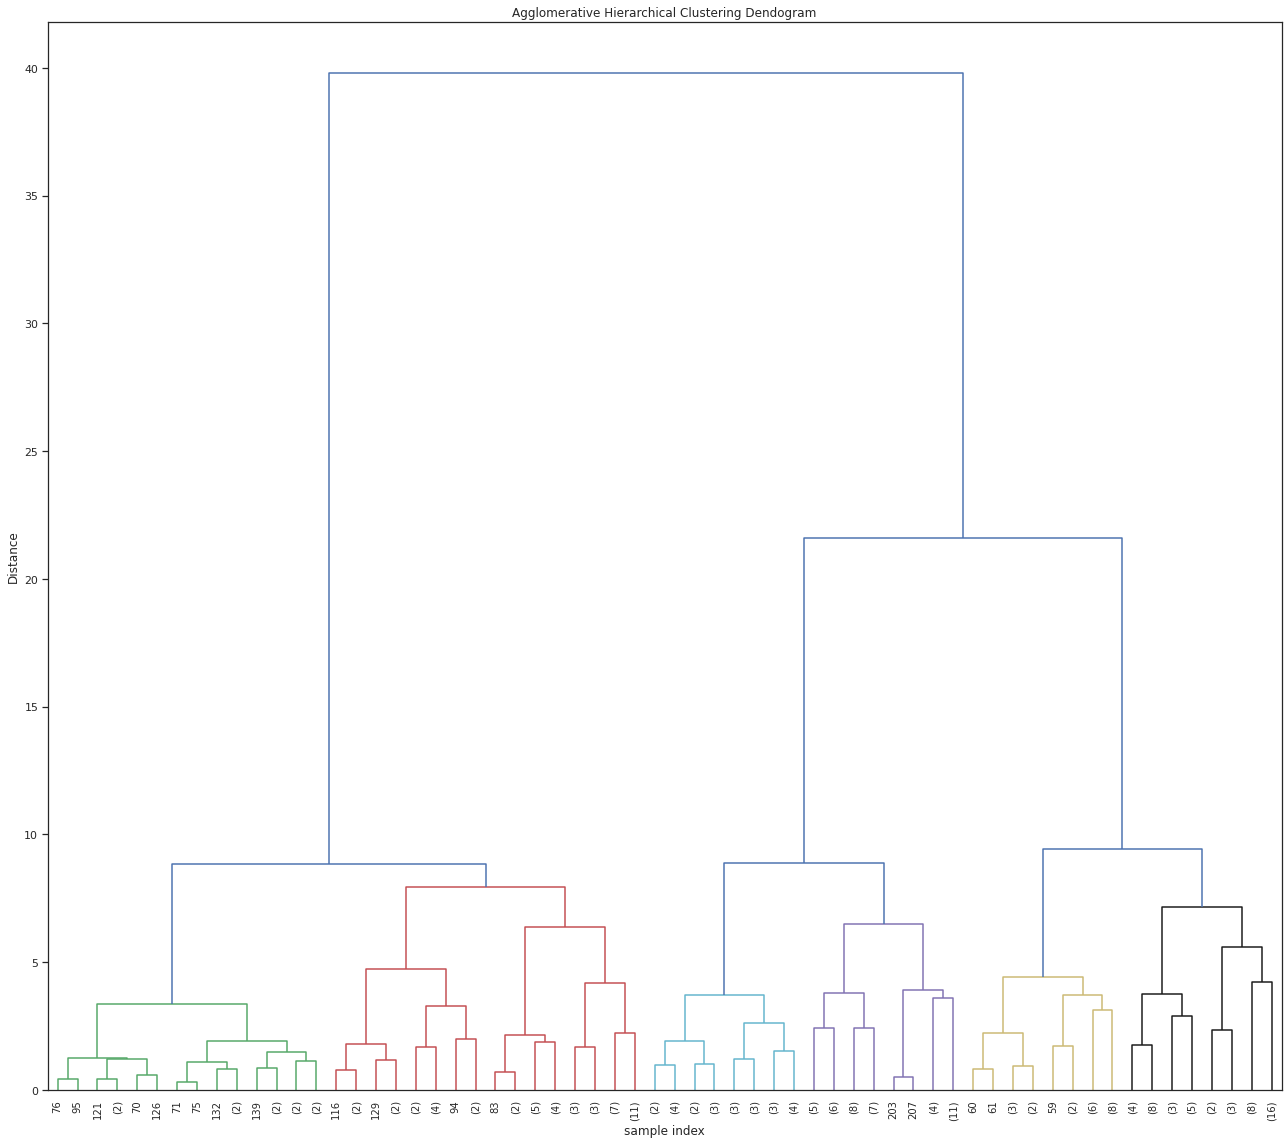

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std_df, 'ward')
dendrogram(Z,leaf_rotation=90.0,color_threshold=8,
           leaf_font_size=10,truncate_mode='level',p=5)
plt.tight_layout()

In [ ]:
#Sub cluster analysis

In [ ]:
Df1=Df1.drop('label',axis=1)

In [ ]:
Df1.shape

(70, 7)

In [ ]:
agc_sub = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
agc_sub.fit(Df1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [ ]:
Df1_copy=Df1.copy(deep=True)
Df1_copy['labels']=agc_sub.labels_


In [ ]:
Df1_copy.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,labels
72,0.831096,0.898583,0.224893,0.790635,0.890082,0.559209,0.780995,1
94,1.210046,1.504948,-1.094408,2.347171,0.600814,0.821881,2.120966,0
73,1.468420,1.305384,1.573889,1.188819,1.781768,-0.509476,1.368379,0
132,0.183438,0.261515,-0.016908,0.577969,0.024933,0.507875,0.789153,1
89,2.078184,1.911749,1.361783,1.858491,2.052459,0.877215,1.861946,0


In [ ]:
messa_0=Df1_copy[Df1_copy['labels']==0]
messa_0.describe()

,A,P,C,LK,WK,A_Coef,LKG,labels
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,1.415462,1.389213,0.745760,1.356193,1.336497,-0.198713,1.361701,0.0
std,0.355921,0.377675,0.608363,0.538229,0.343938,0.869484,0.527301,0.0
min,0.438367,0.338271,-1.094408,0.182048,0.600814,-1.485494,0.071238,0.0
25%,1.258276,1.240143,0.294888,0.993121,1.132907,-0.957818,1.027778,0.0
50%,1.409855,1.351437,0.780612,1.353975,1.359809,-0.424808,1.405091,0.0
75%,1.575215,1.631593,1.198461,1.745371,1.545577,0.413873,1.685526,0.0
max,2.181534,2.065260,1.688427,2.367533,2.055112,1.987902,2.328998,0.0


In [ ]:
messa_1=Df1_copy[Df1_copy['labels']==1]
messa_1.describe()

,A,P,C,LK,WK,A_Coef,LKG,labels
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,0.673171,0.756384,0.092718,0.774322,0.577907,0.383452,0.923225,1.0
std,0.303816,0.326872,0.385116,0.348691,0.234068,0.355961,0.292280,0.0
min,0.183438,0.230813,-0.517479,0.202410,0.024933,-0.116136,0.244598,1.0
25%,0.465927,0.560860,-0.271435,0.554214,0.389835,0.064201,0.789153,1.0
50%,0.679517,0.814152,0.224893,0.790635,0.566314,0.377206,0.956394,1.0
75%,0.858656,0.959987,0.424273,0.979546,0.805159,0.604544,1.101201,1.0
max,1.309950,1.420517,0.661832,1.485194,0.890082,1.221221,1.415289,1.0


In [ ]:
messa_0.shape

(51, 8)

In [ ]:
messa_1.shape

(19, 8)

In [ ]:
messa_0_cent=np.array(np.mean(messa_0.iloc[:,:-1]))
messa_1_cent=np.array(np.mean(messa_1.iloc[:,:-1]))


In [ ]:
messa_0_cent

array([ 1.41546184,  1.38921295,  0.74575971,  1.35619265,  1.3364972 ,
       -0.19871271,  1.36170085])

In [ ]:
messa_1_cent

array([0.67317068, 0.75638367, 0.09271755, 0.77432236, 0.57790748,
       0.38345189, 0.92322494])

In [ ]:
messa_0_in=0
messa_1_in=0
for i in np.arange(messa_0.shape[0]):
  messa_0_in=messa_0_in+np.sum((messa_0.iloc[i,:-1]-messa_0_cent)**2)
for i in np.arange(messa_1.shape[0]):
  messa_1_in=messa_1_in+np.sum((messa_1.iloc[i,:-1]-messa_1_cent)**2)


In [ ]:
messa_0_in+messa_1_in

117.32039794275475

In [ ]:
grain_AGC_labeled.loc[203]

A        -0.739821
P        -0.882135
C         0.695769
LK       -1.007977
WK       -0.444794
A_Coef    3.170590
LKG      -0.832274
label     2.000000
Name: 203, dtype: float64

In [ ]:
grain_AGC_labeled.loc[203]

A        -0.739821
P        -0.882135
C         0.695769
LK       -1.007977
WK       -0.444794
A_Coef    3.170590
LKG      -0.832274
label     2.000000
Name: 203, dtype: float64

**Comparing Original Classes and K-Means Algorithm Classes:**

For visualization I will use only two features (A and P) for the original and predicted datasets. Different classes will have seperate color and styles.

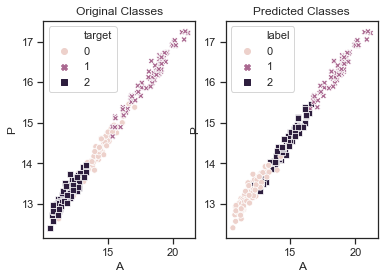

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [ ]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
Predicted Data Classes:
0    77
2    72
1    61
Name: label, dtype: int64


**HIERARCHICAL CLUSTERING ALGORITHM:**

**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

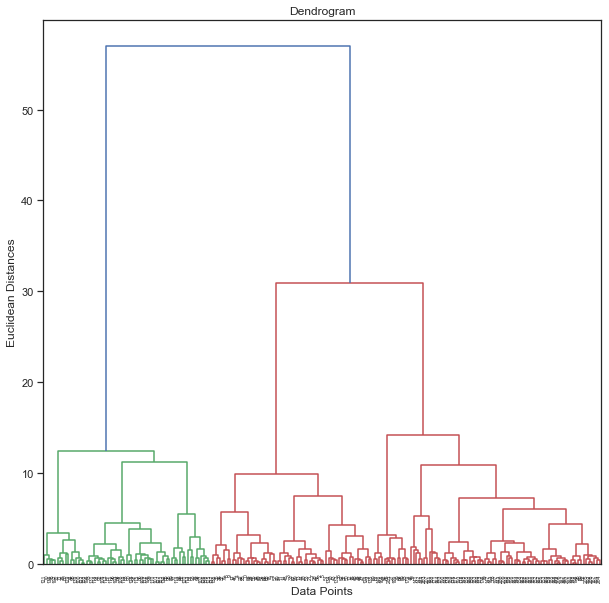

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

**From the dendrogram we can read there are 3 classes in our data set.**

**Hierarchical Clustering Algorithm:**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

**Comparing Original, K-Means and Hierarchical Clustered Classes:**

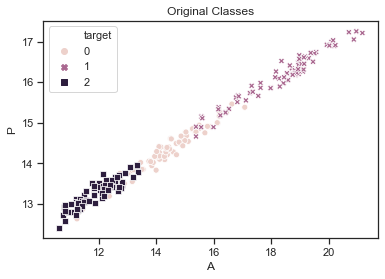

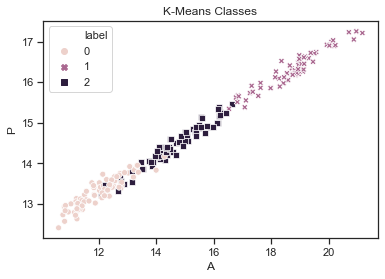

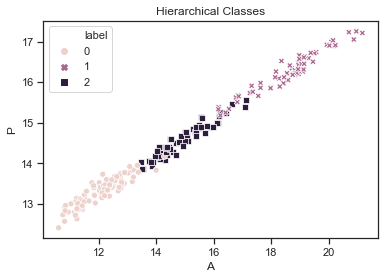

In [ ]:
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_h)
plt.show()

In [ ]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
K-Means Predicted Data Classes:
0    77
2    72
1    61
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    86
1    63
2    61
Name: label, dtype: int64


We can see our models' differences from the comparision of our algorithms' class counts.



## Build An Classification model :-

In [ ]:
- (0.5*np.log2(0.5)+0.5*np.log2(0.5))

1.0

In [ ]:
np.log2(0.0000001+0)

-23.253496664211536

In [ ]:
- (1*np.log2(1)+0*np.log2(0))

nan

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

* m1 model object is fitted with X_pca 
* km model object is fitted with X_std


In [ ]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
values=model_selection.cross_val_score(LR,X_std,km.labels_,cv=kf,scoring='f1_weighted')
print(values)
b_e=1-np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)


[0.98573824 1.         0.97117523]
Bias_error: 0.014362174506209247
VE: 0.014412646629129581


In [ ]:
1-np.mean(values)

0.014362174506209247

In [ ]:
np.std(1-values,ddof=1)

0.014412646629129581

In [ ]:
values2=model_selection.cross_val_score(LR,X_pca,m1.labels_,cv=kf,scoring='f1_weighted')
print(values2)
b_e=1-np.mean(values2)
v_e=np.std(values2,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)


[0.97146802 0.97148185 0.9568888 ]
Bias_error: 0.033387109972916496
VE: 0.008421310073075436


In [ ]:
(0.02376-0.01436)/0.02376

0.39562289562289565

In [ ]:
(0.014412-0.008232)/0.014412

0.42880932556203166

In [ ]:
values2

array([0.98571429, 0.95714286, 0.98571429])

## K-Means

In [ ]:
df_k.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,label
17,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,2
121,18.14,16.12,0.8772,6.059,3.563,3.619,6.011,1
112,19.13,16.31,0.9035,6.183,3.902,2.109,5.924,1
65,12.88,13.50,0.8879,5.139,3.119,2.352,4.607,2
19,12.72,13.57,0.8686,5.226,3.049,4.102,4.914,0


### Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [ ]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [ ]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9795918367346939
Validation Accuracy  ::  0.9523809523809523


In [ ]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.95      0.98        21
           2       1.00      0.90      0.95        20

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  0.9931972789115646
Validation Accuracy  ::  0.9682539682539683


In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [ ]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [ ]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [ ]:
x_standardize = x.apply(zscore)

In [ ]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [ ]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [ ]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


--------------------

## Agglomerative clustering

In [ ]:
df_h.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,label
181,12.46,13.41,0.8706,5.236,3.017,4.9870,5.147,0
99,18.72,16.34,0.8810,6.219,3.684,2.1880,6.097,1
36,16.20,15.27,0.8734,5.826,3.464,2.8230,5.527,2
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,0
130,18.30,15.89,0.9108,5.979,3.755,2.8370,5.962,1


In [ ]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [ ]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9795918367346939
Validation Accuracy  ::  0.9523809523809523


In [ ]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.95      0.98        21
           2       1.00      0.90      0.95        20

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  0.9931972789115646
Validation Accuracy  ::  0.9682539682539683


In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [ ]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [ ]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [ ]:
x_standardize = x.apply(zscore)

In [ ]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [ ]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [ ]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


-------------------------